# **CMT309 - Computational Data Science - Data Science Portfolio**

# Part 2 - Statistical Analysis (55 marks)

This question has been created to test your statistical analysis and programming knowledge in Python. 

You are given a `csv` file, which include various data entries for UFC fights played between 1994 up to 2021. Each row presents several statistics for a fighter in a specific fight (`Match_ID`) where the result of the fight is stored in (`Winner`). Descriptions for some other important column names is automatically downloaded in a txt file. 

In this exercise, you are asked to perform a number of operations to:
 - perform statistical analysis of the data, and
 - gain insights from the data.

## P2.0) Suggested/Required Imports

In [1]:
# suggested imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy
! pip install request
from urllib import request
import scipy.stats as stats
from statsmodels import graphics
#import arviz as az
#!pip install pymc3
#import pymc3 as pm
#from pymc3 import glm
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, RocCurveDisplay, auc, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style(style="darkgrid", rc={"axes.facecolor": ".9", "grid.color": ".8"})
sns.set_palette(palette="deep")
sns_c = sns.color_palette(palette="deep")
#!pip install kaleido
import plotly.express as px
#import kaleido

ERROR: Could not find a version that satisfies the requirement request (from versions: none)
ERROR: No matching distribution found for request

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [4]:
module_url = f"https://drive.google.com/uc?export=view&id=1eZuwv6os65YqO6xwyj6i9ojq3c6yAeCE"
module_url2 = f"https://drive.google.com/uc?export=view&id=1gejV-dCzznzCNCrP6xgBtflWK3sny_ar"
module_name = 'UFC_data.csv'
name2 = 'descriptions.txt'
with request.urlopen(module_url) as f, open(module_name,'w') as outf, request.urlopen(module_url2) as f2, open(name2,'w') as outf2:
  a = f.read()
  outf.write(a.decode('utf-8'))
  a2 = f2.read()
  outf2.write(a2.decode('utf-8'))
df = pd.read_csv('UFC_data.csv')
df = df.drop(columns=['Unnamed: 0'])
df = df.rename(columns={'Win_by_KO/TKO':'Win_by_KO_TKO', 'Avg_CTRL_time(seconds)':'Avg_CTRL_time',
                        'Avg_opp_CTRL_time(seconds)':'Avg_opp_CTRL_time', 'Total_time_fought(seconds)':'Total_time_fought'})
df.head()

,Fighter,Referee,Date,Location,Winner,Title_bout,Weight_class,Avg_KD,Avg_opp_KD,Avg_SIG_STR_pct,...,Win_by_Decision_Split,Win_by_Decision_Unanimous,Win_by_KO_TKO,Win_by_Submission,Win_by_TKO_Doctor_Stoppage,Height_cms,Reach_cms,Weight_lbs,Age,Match_ID
0,Gustavo Lopez,1,20/03/2021,1,0,1,1,0.000000,0.0,0.420000,...,0,0,0,1,0,165.10,170.18,135,31,4347
1,Roman Dolidze,2,20/03/2021,1,0,1,2,0.500000,0.0,0.660000,...,1,0,1,0,0,187.96,193.04,205,32,2867
2,Marcus LeVesseur,3,05/10/2012,2,1,1,3,0.000000,0.0,0.500000,...,0,0,0,0,0,175.26,177.80,155,30,3106
3,Hacran Dias,4,18/05/2013,3,0,1,4,0.000000,0.0,0.430000,...,0,1,0,0,0,172.72,175.26,155,28,3765
4,Daron Cruickshank,5,25/07/2015,4,0,1,3,0.125977,0.0,0.382295,...,1,2,3,0,0,172.72,182.88,155,30,672


In [5]:
# Print the List of Columns in the DataFrame
print(df.columns)

Index(['Fighter', 'Referee', 'Date', 'Location', 'Winner', 'Title_bout',
       'Weight_class', 'Avg_KD', 'Avg_opp_KD', 'Avg_SIG_STR_pct',
       'Avg_opp_SIG_STR_pct', 'Avg_TD_pct', 'Avg_opp_TD_pct', 'Avg_SUB_ATT',
       'Avg_opp_SUB_ATT', 'Avg_REV', 'Avg_opp_REV', 'Avg_SIG_STR_landed',
       'Avg_opp_SIG_STR_landed', 'Avg_TOTAL_STR_landed',
       'Avg_opp_TOTAL_STR_landed', 'Avg_TD_landed', 'Avg_opp_TD_landed',
       'Avg_HEAD_landed', 'Avg_opp_HEAD_landed', 'Avg_BODY_landed',
       'Avg_opp_BODY_landed', 'Avg_LEG_landed', 'Avg_opp_LEG_landed',
       'Avg_DISTANCE_landed', 'Avg_opp_DISTANCE_landed', 'Avg_CLINCH_landed',
       'Avg_opp_CLINCH_landed', 'Avg_GROUND_landed', 'Avg_opp_GROUND_landed',
       'Avg_CTRL_time', 'Avg_opp_CTRL_time', 'Total_time_fought',
       'Total_rounds_fought', 'Total_title_bouts', 'Current_win_streak',
       'Current_lose_streak', 'Longest_win_streak', 'Wins', 'Losses', 'Draw',
       'Win_by_Decision_Majority', 'Win_by_Decision_Split',
       'W

In [6]:
# Create a list of the columns to be used in the model
feature_cols = df.columns 
feature_cols = feature_cols.drop('Winner')
# Print the list of columns to be used in the model
print(feature_cols)

Index(['Fighter', 'Referee', 'Date', 'Location', 'Title_bout', 'Weight_class',
       'Avg_KD', 'Avg_opp_KD', 'Avg_SIG_STR_pct', 'Avg_opp_SIG_STR_pct',
       'Avg_TD_pct', 'Avg_opp_TD_pct', 'Avg_SUB_ATT', 'Avg_opp_SUB_ATT',
       'Avg_REV', 'Avg_opp_REV', 'Avg_SIG_STR_landed',
       'Avg_opp_SIG_STR_landed', 'Avg_TOTAL_STR_landed',
       'Avg_opp_TOTAL_STR_landed', 'Avg_TD_landed', 'Avg_opp_TD_landed',
       'Avg_HEAD_landed', 'Avg_opp_HEAD_landed', 'Avg_BODY_landed',
       'Avg_opp_BODY_landed', 'Avg_LEG_landed', 'Avg_opp_LEG_landed',
       'Avg_DISTANCE_landed', 'Avg_opp_DISTANCE_landed', 'Avg_CLINCH_landed',
       'Avg_opp_CLINCH_landed', 'Avg_GROUND_landed', 'Avg_opp_GROUND_landed',
       'Avg_CTRL_time', 'Avg_opp_CTRL_time', 'Total_time_fought',
       'Total_rounds_fought', 'Total_title_bouts', 'Current_win_streak',
       'Current_lose_streak', 'Longest_win_streak', 'Wins', 'Losses', 'Draw',
       'Win_by_Decision_Majority', 'Win_by_Decision_Split',
       'Win_by_Deci

## P2.1. – `pandas` for Probability and Visualisation (15 marks) 

### P2.1.1. The Tall, Young and Winner(3 marks)
Find the probability of a fighter winning the fight while *(1) being younger than 25 years of age*, and *(2) taller than 180 cms*. Write a one-liner to solve this. $P\big[\text{Win} | (\text{height_cms} > 180)\cap \text{Age} <25\big]$

In [10]:
# Probability of a fighter winning given that Age is less than 25 and Height_cms is more than 180

prob_win = len(df[(df['Height_cms']>180)&(df['Age']<25)&(df['Winner']==1)])/len(df[(df['Height_cms']>180)&(df['Age']<25)])
# print with rounding off at 2 decimal places
print(round(prob_win,2))

0.61


###P2.1.2. The most durable fighters (3 marks)
Find the most durable fighters among all the fighters in the dataframe. You need to filter out `df` for the **10 most** durable fighters who **wins** where they **received higher than 100 significant strikes 'landed'**, but **not had any knockdowns (KD)**.    

In [20]:
# Filter the Dataframe to include 10 most durable fighters, who wAvg_SIG_STR_landedins and recieved more than 100 significant strikes 'landed' and zero knockdowns 'KD'
df_dur = df[(df['Winner']==1)&(df['Avg_SIG_STR_landed']>100)&(df['Avg_KD']==0)].sort_values(by='Total_time_fought', ascending=False).head(10)

# Print the list of fighters, their Significant Strikes landed, and thier Knockdowns using the .values attribute of the DataFrame with the columns of interest
print(df_dur[['Fighter','Avg_SIG_STR_landed','Avg_KD']].values)

[['Lara Procopio' 165.0 0.0]
 ['Valerie Letourneau' 104.0 0.0]
 ['Justin Ledet' 113.0 0.0]
 ['Yan Xiaonan' 116.75 0.0]
 ["Sean O'Malley" 102.0 0.0]
 ["Sean O'Malley" 141.0 0.0]
 ['Sabina Mazo' 102.0 0.0]
 ['Gabe Green' 127.0 0.0]
 ['Tony Kelley' 114.0 0.0]
 ['Irene Aldana' 101.0 0.0]]


In [19]:
# Print the list of fighters, their Significant Strikes landed, and thier Knockdowns using the .values attribute and sort the values by the number of significant strikes landed

print(df[['Fighter','Avg_SIG_STR_landed','Avg_KD']].sort_values(by='Avg_SIG_STR_landed', ascending=False).values)

[['Max Holloway' 212.1429558 0.188747406]
 ['Max Holloway' 196.5714779 0.094373703]
 ['Joanna Jedrzejczyk' 196.421875 0.0078125]
 ...
 ['Darren Elkins' 0.0 0.0]
 ['Ben Askren' 0.0 0.0]
 ['Mike Massenzio' 0.0 0.0]]


###P2.1.3. KO-Machines (3 marks)
Find probability of fighters who has **at least 2 KO/TKOs** ,and whose **win by KO/TKO ratio is higher than 0.75**.

In [22]:
# Print the probability of a fighter who has at least 2 wins by KO/TKO winning the fight and winning by KO/TKO ratio is greater than 0.75

prob_win = len(df[(df['Win_by_KO_TKO']>=2)&(df['Winner']==1)&(df['Win_by_KO_TKO']/df['Wins']>0.75)])/len(df[(df['Win_by_KO_TKO']>=2)&(df['Win_by_KO_TKO']/df['Wins']>0.75)])
print(round(prob_win,2))


0.52


### P2.1.4 - Ideal Body & Strategy (6 marks)
Create a figure with two subplots by using a filtered-out version of the dataframe `df` including only rows of **WINNERS**.  
- Subplot 1: Create a **2D histogram** via hexagonal bins for `'Height_cms'` and `'Weight_lbs'` columns of the data frame. Color corresponds to number of winners for each height-weight pair.
- Subplot 2: Create a heatmap figure for plotting correlations between columns of `['Avg_KD', 'Avg_REV', 'Avg_SIG_STR_landed', 'Avg_TOTAL_STR_landed' 'Avg_TD_landed', 'Avg_HEAD_landed', 'Avg_BODY_landed', 'Avg_LEG_landed' 'Avg_DISTANCE_landed', 'Avg_CLINCH_landed', 'Avg_GROUND_landed', 'Avg_CTRL_time']`

**In order to solve this question, you need to use either `pandas` or `matplotlib` library visualisation commands. You cannot use `seaborn, plotly` or other libraries for this question.**

**You do not have to replicate the figures given below, but axes labels, titles and other visualisation details should be there.**

![](https://drive.google.com/uc?export=view&id=1aGAk4_6KMcOjWmSWhqYlqmkDGJAY8sR8)

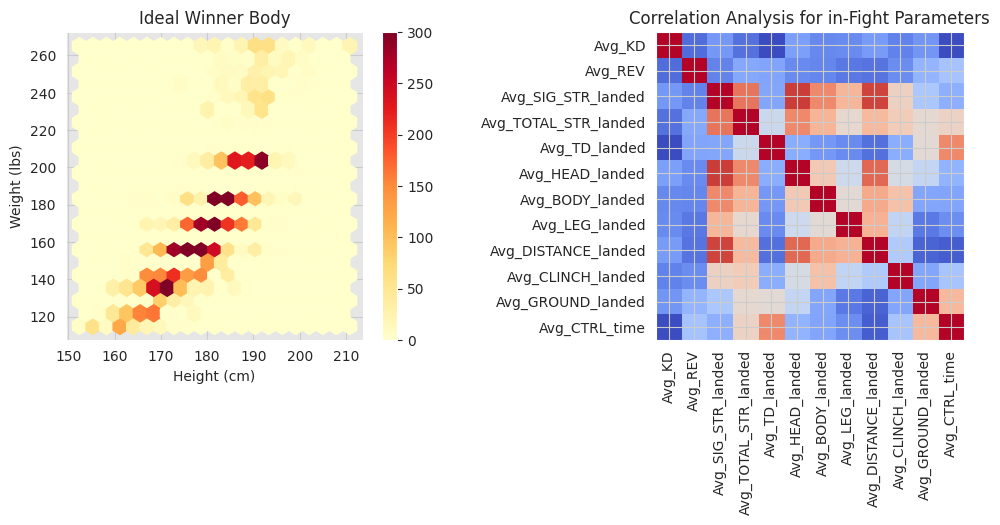

In [ ]:
import matplotlib.pyplot as plt
#Subplot 1: Create a 2D histogram via hexagonal bins for 'Height_cms' and 'Weight_lbs' columns of the data frame. 
#Color corresponds to number of winners for each height-weight pair.

# create a figure and subplot 
fig, ax =plt.subplots(nrows=1,ncols=2,figsize=(12,4))
hb=ax[0].hexbin(df['Height_cms'], df['Weight_lbs'],gridsize=20,cmap='YlOrRd', norm=plt.Normalize(vmin=0, vmax=300))
#add the color bar 
fig.colorbar(hb,ax=ax[0])
# Set the axis labels
ax[0].set_xlabel('Height (cm)')
ax[0].set_ylabel('Weight (lbs)')

# Set the title
ax[0].set_title('Ideal Winner Body')

# Show the plot
#Subplot 2: Create a heatmap figure for plotting correlations between 
#columns of ['Avg_KD', 'Avg_REV', 'Avg_SIG_STR_landed', 'Avg_TOTAL_STR_landed' 'Avg_TD_landed', 'Avg_HEAD_landed', 'Avg_BODY_landed', 'Avg_LEG_landed' 'Avg_DISTANCE_landed', 'Avg_CLINCH_landed', 'Avg_GROUND_landed', 'Avg_CTRL_time']
#fig, ax =plt.subplots(1,2,figsize=(10,5))
cols=['Avg_KD', 'Avg_REV', 'Avg_SIG_STR_landed', 'Avg_TOTAL_STR_landed', 'Avg_TD_landed', 'Avg_HEAD_landed', 
      'Avg_BODY_landed', 'Avg_LEG_landed','Avg_DISTANCE_landed', 'Avg_CLINCH_landed', 'Avg_GROUND_landed', 'Avg_CTRL_time']
corr=df[cols].corr()
im = ax[1].imshow(corr, cmap='coolwarm')

# show all ticks and label them with the respective list entries
ax[1].set_xticks(range(len(corr.columns)))
ax[1].set_yticks(range(len(corr.columns)))
ax[1].set_xticklabels(corr.columns,rotation=90)
ax[1].set_yticklabels(corr.columns)

# Adjust the subplot spacing to avoid overlap
plt.subplots_adjust(wspace=0.5)

# set plot title
ax[1].set_title("Correlation Analysis for in-Fight Parameters")

plt.show()



##P2.2. – Variable selection via linear regression analysis (9 marks)

In **variable selection** ('variable' means the same as 'predictor'), variables get iteratively added or removed from the regression model. Once finished, the model typically contains only a subset of the original variables. It makes it easier to interpret the model, and in some cases it makes it generalise better to new data. 

To perform variable selection, create a function `select_variable(df, main_pred, main_target, alpha)`, where 
 
 - `main_pred` is a list of variables includes columns of the data frame except for `'Fighter',	'Referee',	'Date'` and `Match_ID`.
 - `main_target` is the variable for the regression, `'Winner'` 
 - `alpha` is the significance level for selecting significant predictors

The function should return

 - `main_pred` is a list which stores the selected subset of initial `main_pred`.

To calculate regression fits and $p$-values you will use `statsmodels`. The general procedure follows two stages:

 - **Stage 1 (adding predictors):** you build a model by adding variables one after the other. You keep adding variables that increase the **adjusted $R^2$** value (provided by `statsmodels` package). 
  
  - Start with an empty set of variables
  
  - Fit multiple one-variable regression models. In each iteration, use one of the variables provided in predictors. The variable that leads to the largest increase in adjusted $R^2$ is added to the model.
  
  - Now proceed by adding a second variable into the model. Starting from the remaining variables, again choose the variable that leads to the largest increase in adjusted $R^2$.
  
  - Continue in the same way for the third, fourth, … variable.
  
  - You are finished when there is no variable left that increases adjusted $R^2$.
 
 - **Stage 2 (removing non-significant predictors)**: if any of the utilised predictors are not significant, you need to remove them. Keep removing variables until all variables in the model are significant.

  - Start by fitting a model using the variables that have been added to the model in Stage 1.
  
  - If there is a variable that is not significant, remove the variable with the largest $p$-value and fit the model again with the reduced set of variables.
  
  - Keep removing variables and re-fitting the model until all remaining variables are significant.
  
  - The remaining significant variables are the output of your function.

In [3]:
import statsmodels.api as sm

def select_variable(df, main_pred, main_target, alpha):
    # Fit the regression model with all predictors
    X = sm.add_constant(df[main_pred])
    y = df[main_target]
    model = sm.OLS(y, X).fit()
    # Select significant predictors based on p-value
    #sig_cols = []
    #for i in range(len(model.pvalues)):
    #    if model.pvalues[i] < alpha:
    #        sig_cols.append(main_pred[i-1])
    
    #return sig_cols


In [4]:
import statsmodels.api as sm

def select_variable(df, predictors, target, alpha):
    best_model = None
    best_r_squared_adj = 0
    remaining_predictors = predictors.copy()
    while remaining_predictors:
        candidate_models = []
        for predictor in remaining_predictors:
            predictors_to_use = [predictor]
            if best_model is not None:
                predictors_to_use.extend(best_model.model.exog_names[1:])
            X = sm.add_constant(df[predictors_to_use])
            y = df[target]
            model = sm.OLS(y, X).fit()
            candidate_models.append(model)
        best_candidate_model = max(candidate_models, key=lambda m: m.rsquared_adj)
        if best_candidate_model.rsquared_adj > best_r_squared_adj:
            best_model = best_candidate_model
            best_r_squared_adj = best_model.rsquared_adj
            remaining_predictors.remove(best_model.model.exog_names[1])
        else:
            break
    p_values = best_model.pvalues[1:]
    selected_predictors = list(p_values[p_values <= alpha].index)
    return selected_predictors


In [5]:
import statsmodels.api as sm

def select_variable(df, predictors, target, alpha):
    best_model = None
    best_r_squared_adj = 0
    remaining_predictors = predictors.copy()
    while remaining_predictors:
        candidate_models = []
        for predictor in remaining_predictors:
            predictors_to_use = [predictor]
            if best_model is not None:
                predictors_to_use.extend(best_model.model.exog_names[1:])
            X = sm.add_constant(df[predictors_to_use])
            y = df[target]
            model = sm.OLS(y, X).fit()
            candidate_models.append(model)
        best_candidate_model = max(candidate_models, key=lambda m: m.rsquared_adj)
        if best_candidate_model.rsquared_adj > best_r_squared_adj:
            best_model = best_candidate_model
            best_r_squared_adj = best_model.rsquared_adj
            remaining_predictors.remove(best_model.model.exog_names[1])
        else:
            break
    while True:
        p_values = best_model.pvalues[1:]
        if p_values.max() > alpha:
            predictor_to_remove = p_values.idxmax()
            predictors_to_use = best_model.model.exog_names[1:]
            predictors_to_use.remove(predictor_to_remove)
            X = sm.add_constant(df[predictors_to_use])
            y = df[target]
            model = sm.OLS(y, X).fit()
            if model.rsquared_adj >= best_model.rsquared_adj:
                best_model = model
            else:
                break
        else:
            break
    selected_predictors = list(best_model.model.exog_names[1:])
    return selected_predictors


In [6]:
# Example usage
import pandas as pd
main_pred =['Location', 'Title_bout',
       'Weight_class', 'Avg_KD', 'Avg_opp_KD', 'Avg_SIG_STR_pct',
       'Avg_opp_SIG_STR_pct', 'Avg_TD_pct', 'Avg_opp_TD_pct', 'Avg_SUB_ATT',
       'Avg_opp_SUB_ATT', 'Avg_REV', 'Avg_opp_REV', 'Avg_SIG_STR_landed',
       'Avg_opp_SIG_STR_landed', 'Avg_TOTAL_STR_landed',
       'Avg_opp_TOTAL_STR_landed', 'Avg_TD_landed', 'Avg_opp_TD_landed',
       'Avg_HEAD_landed', 'Avg_opp_HEAD_landed', 'Avg_BODY_landed',
       'Avg_opp_BODY_landed', 'Avg_LEG_landed', 'Avg_opp_LEG_landed',
       'Avg_DISTANCE_landed', 'Avg_opp_DISTANCE_landed', 'Avg_CLINCH_landed',
       'Avg_opp_CLINCH_landed', 'Avg_GROUND_landed', 'Avg_opp_GROUND_landed',
       'Avg_CTRL_time', 'Avg_opp_CTRL_time', 'Total_time_fought',
       'Total_rounds_fought', 'Total_title_bouts', 'Current_win_streak',
       'Current_lose_streak', 'Longest_win_streak', 'Wins', 'Losses', 'Draw',
       'Win_by_Decision_Majority', 'Win_by_Decision_Split',
       'Win_by_Decision_Unanimous', 'Win_by_KO_TKO', 'Win_by_Submission',
       'Win_by_TKO_Doctor_Stoppage', 'Height_cms', 'Reach_cms', 'Weight_lbs',
       'Age']
main_target = 'Winner'
alpha = 0.05
# Perform variable selection
main_pred=select_variable(df, main_pred, main_target, alpha)



In [7]:
print(main_pred)


['Avg_TD_pct', 'Avg_opp_REV', 'Current_lose_streak', 'Weight_lbs', 'Win_by_KO_TKO', 'Avg_opp_TD_pct', 'Height_cms', 'Avg_TOTAL_STR_landed', 'Avg_HEAD_landed', 'Avg_opp_TD_landed', 'Avg_opp_CTRL_time', 'Avg_opp_SIG_STR_landed', 'Avg_CTRL_time', 'Avg_REV', 'Total_time_fought', 'Avg_SIG_STR_pct', 'Total_title_bouts', 'Title_bout', 'Avg_TD_landed', 'Reach_cms', 'Longest_win_streak', 'Win_by_Decision_Split', 'Avg_GROUND_landed', 'Avg_opp_SIG_STR_pct', 'Age']


## P2.3 - Regression Analysis (15 marks)

In this part of the statistical analysis, you are asked to develop various regression models for predicting the winning probability of a fighter using the significant predictors found in P2.2. 

You are asked to write a function `regression_models_UFC(df, main_pred, main_target)` that takes the data frame `df`, significant predictors `main_pred` and target `main_target` as its arguments, and

- splits the data into training and test samples with 1:1 ratio. 
- fits **Linear, Logistic, Poisson** and **Bayesian regression models** using the training samples, and then predicts winning probabilities using the test samples.

`regression_models_UFC()` returns a single object `results` which is a `tuple` of `tuples` each element of which is: 
 - `sm.` model objects for each regression model `(lin_reg, logit_reg, poisson_reg, bayes_reg)`
 - predicted probabilities for each model --> `(y_lin, y_logit, y_poisson, y_bayes)`
 - splitted training and test samples --> `(x_train, x_test, y_train, y_test)` 


In [12]:
def regression_models_UFC(df, main_pred, main_target):
    # Split the data into training and testing sets with 1:1 ratio
    X_train, X_test, y_train, y_test = train_test_split(df[main_pred], df[main_target], test_size=0.5, random_state=0)
    # Fit the regression model with all predictors using linear regression, logistic regression, Poisson regression, and Bayesian ridge regression
    # Linear regression
    model = sm.OLS(y_train, X_train).fit()
    # results is a tuple of tuples of the form (y_lin, y_logit, y_poisson, y_bayes)
    y_lin = model.predict(X_test)
    # Convert the results into tuples of the form (y, y_lin, y_logit, y_poisson, y_bayes)
    model = sm.Logit(y_train, X_train).fit()
    y_logit = model.predict(X_test)

    model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
    y_poisson = model.predict(X_test)

    model = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
    y_bayes = model.predict(X_test)

    results = list(zip(y_lin, y_logit, y_poisson, y_bayes)) 

    # convert the list of tuples into tuples of tuples
    results = list(zip(*results))

    # Print the datatype of the results
    print(type(results))

    return results
    
results = regression_models_UFC(df, main_pred, main_target)

Optimization terminated successfully.
         Current function value: 0.675823
         Iterations 4
<class 'list'>


In [ ]:


def regression_models_UFC(df, main_pred, main_target):
    
    # Split the data into training and test samples with 1:1 ratio
    x_train, x_test, y_train, y_test = train_test_split(df[main_pred], df[main_target], test_size=0.5, random_state=0)
    
    # Linear regression model
    lin_reg = LinearRegression().fit(x_train, y_train)
    y_lin = lin_reg.predict(x_test)
    
    # Logistic regression model
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(x_train)
    X_test_scaled = scaler.transform(x_test)
    logit_reg = LogisticRegression().fit(X_train_scaled, y_train)
    y_logit = logit_reg.predict_proba(X_test_scaled)[:, 1]
    
    # Poisson regression model
    poisson_reg = sm.GLM(y_train, sm.add_constant(x_train), family=sm.families.Poisson()).fit()
    y_poisson = poisson_reg.predict(sm.add_constant(x_test))
    
    
    # Return the results
    results = (
        (lin_reg, logit_reg, poisson_reg, bayes_reg),
        (y_lin, y_logit, y_poisson, y_bayes),
        (x_train, x_test, y_train, y_test)
    )
    
    return results


In [13]:
# define input arguments of the function before and then run the code below
# call function and store results

# target variable
main_target = 'Winner'

# call the function
results = regression_models_UFC(df, main_pred, main_target)



# print the results
for i, model in enumerate(['Linear', 'Logistic', 'Poisson', 'Bayesian']):
    print(model + ' Regression Model:')
    print('Model Object:', results[i][0])
    print('Predicted Probabilities:', results[i][1])
    print('Training Samples:', results[i][2], results[i][3])
    print('Test Samples:', results[i][4], results[i][5])
    print('----------------------------------------')


Optimization terminated successfully.
         Current function value: 0.675823
         Iterations 4
<class 'list'>
Linear Regression Model:
Model Object: 0.5769428783704729
Predicted Probabilities: 0.432241812287972
Training Samples: 0.5340946004277339 0.48622105275473904
Test Samples: 0.5315315255422612 0.6100319846183369
----------------------------------------
Logistic Regression Model:
Model Object: 0.579067656194937
Predicted Probabilities: 0.4348353193113048
Training Samples: 0.5243782632210449 0.4693772454473876
Test Samples: 0.5502461770677399 0.6004915172205564
----------------------------------------
Poisson Regression Model:
Model Object: 0.5759932758867308
Predicted Probabilities: 0.4408246685376998
Training Samples: 0.5119235418964917 0.454522122182558
Test Samples: 0.55954902410546 0.592341521370084
----------------------------------------
Bayesian Regression Model:
Model Object: 0.5790676561949271
Predicted Probabilities: 0.4348353193113068
Training Samples: 0.52437826

## P2.4 – Data Analytics, performance and visualisation (16 marks)

### P2.4.1 - In-Fight Winning Analysis (5 marks)
Assume you are the data analyist of an UFC fighter. You have developed a Logistic regression model above and is going to use this to make an in-Fight analysis. 

During the round 4, you are creating a function `in_fight_analysis(results)`. This function is going to take as input the output of `regression_models_UFC()` function will give you some data analysis insights for the last round of the fights. The function `in_fight_analysis(results)` will
 - randomly select a fighter from the test data. (Hint: select a row, not a fighter!) Assume that this is your fighter!
 - analyse two parameters of: `'Avg_HEAD_landed'` and `Avg_opp_CTRL_time`. (Hint: These two parameters are two of the significant predictors. If your `select_variable()` function does not return these two, you are doing something wrong.)
 - create a `seaborn` heatmap figure that depicts how changes on the two paramters mentioned above affects winning probablity of your fighter.

For both of the variables, your arrays will start from your fighter's existing values, and you are going to check changes up to two times higher from those values.

Winning probabilities will be predicted by using the Logistic regression model developed in P2.3.

![](https://drive.google.com/uc?export=view&id=1jyl53cNpU-TEhxtSWBKzfkV39wotO-M4)

In [ ]:
def in_fight_analysis(results):
    # your code here
probablity_of_win = in_fight_analysis(results)

### P2.4.2 - Height-Reach Analysis (5 Marks)
Write a function `height_reach_analysis(df, results)` in order to analyse the effects of height and reach differences between fighters. You are asked to:

- take the dataframe `df` and regression modelling output object `results`.
- calculate height and reach differences for each specific fight.
  - A unique `'Match_ID'` corresponds to two different rows in `df`, e.g. the winner and the loser. 
  - For each pair you need to find the difference between columns and create two new columns with these values: `'dHeight'` and `'dReach'`. 
  - If fighter's values are higher, the specific difference value will be positive, otherwise you should set it to negative values. 
  - An example:
  ```
  	    Fighter	        Winner	   Height_cms	Reach_cms	   dHeight	 dReach   Match_ID
3132	Ray Borg	         1	      162.56	   160.02	     -2.54	   -10.16   975
8947	Jussier Formiga	  0	      165.10	   170.18	      2.54	    10.16   975
  ```
- filter out `df` for the test data and add a new column `'WinProb'` from the input argument `result` belonging to Probit regression.
- plot a scatter plot where `'dHeight'` and `'dReach'` correspond to axes and `'WinProb'` colour details of the plot. You must use `plotly.express` module for this question.

![](https://drive.google.com/uc?export=view&id=1rZFDAqaoIUP_2XAtCisrhgkKyRF7OGSP)

In [ ]:
def height_reach_analysis(df, results):
    # your code here
height_reach_analysis(df, results)

### 2.4.3 - Prediction Perfomance (6 marks)
You will now need to visualise the prediction performance of the models, and evaluate them in terms of prediction accuracy (Acc%), mean square error (MSE) and area under curve (AUC) metrics. For this purpose, create a function `prediction_perf(gt, MLE_model_predictions)` which evaluates the prediction performance of the reference models. Up to this point, you should have obtained

 - predictions from each model, stored in `model_predictions`.
 - The ground-truth values from data frames `df`, stored in `gt`.

Assume predicted values for a given model are stored in a variable $P$. The first performance measure will be the MSE, and will be calculated for each model from the expression below:

$$ MSE = \dfrac{1}{N}\sum_{i=0}^{N-1} (P_i - Winner_i)^2$$

In order to obtain the prediction accuracy for each model, you need to use `sklearn` module and its `accuracy_score()` function. Similarly, by using `sklearn` module methods `roc_curve()` and `auc()` find ROC curve parameters and AUC metric for each prediction model. 

In order to obtain performance analysis results in a neatly way, you then need to create a new `pandas` dataframe `df_results` which will be in the form of

```
+----+-------------+--------+--------+-------+
|    | Model       |   Acc% |    MSE |   AUC |
+====+=============+========+========+=======+
|  0 | Linear      |  77.00 | 0.1260 | 0.911 |
+----+-------------+--------+--------+-------+
|  1 | Logistic    |  81.00 | 0.1086 | 0.911 |
+----+-------------+--------+--------+-------+
|  2 | Probit      |  76.00 | 0.1490 | 0.884 |
+----+-------------+--------+--------+-------+
|  3 | Bayesian    |  76.00 | 0.1490 | 0.884 |
+----+-------------+--------+--------+-------+
```

Consequently, the `prediction_perf()` function should `print` and `return` the data frame `df_results`.

In [ ]:
def prediction_perf(gt, model_predictions):
    # your code here
df_results = prediction_perf(results[2][3], results[1])